In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats 

sns.set_theme()

In [2]:
import sys
import os


module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")
    
    


In [3]:
#we import a couple of important scripts we are going to use in this notebook

from univariate import Univariate,readCSV
from loaddata import ReadData

In [4]:


%run ../scripts/loaddata.py

Displaying the first 5 rows of the dataset
Reading the data....
successfully read the dataset...
              Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18     770.0 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04     235.0 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11       1.0 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25     486.0 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23     565.0 2019-04-25 10:40:32   

   End ms  Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0   662.0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1   606.0  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2   652.0  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3   171.0  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4   954.0  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

  Last Location Name  ...  Youtube DL

In [5]:
dataRead=ReadData('../data/Week1_challenge_data_source.xlsx')
data=dataRead.readData()

Reading the data....
successfully read the dataset...


In [6]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
#we also define a couple of utility functions we shall use

def groupCol(col,thresh):
    
    print(data.groupby(col)['IMEI'].nunique().sort_values(ascending=False)[:thresh])  
    fig, ax = plt.subplots(figsize=(15,7))
    plt.title("This is the top {} {} in the datset".format(thresh,col))
    data.groupby(col)['IMEI'].nunique().sort_values(ascending=False)[:thresh].plot(ax=ax,kind='bar')
#     sns.countplot(y=data[col],order=data[col].value_counts().iloc[:thresh].index)
#     plt.xticks(rotation=90)
    
sns.set_palette("pastel")

def vizHist(datar,col,c):
  # plt.figure(figsize=(10,8))
  sns.histplot(x=datar[col],bins=40 , palette='rocket' ,kde=True )
  plt.title("Histogram of {}".format(col), fontsize=20)
  plt.ylabel('Frequency')
  plt.xlabel(col)
  plt.show()
  # plt.figure(figsize=(10,8))
  plt.title("Boxplot of {}".format(col))
  sns.boxplot(datar[col],palette='mako')    
    

    

Handset Type
Huawei B528S-23A                10638
Apple iPhone 6S (A1688)          6765
undefined                        6716
Apple iPhone 6 (A1586)           6271
Apple iPhone 7 (A1778)           4721
Apple iPhone Se (A1723)          3764
Apple iPhone 8 (A1905)           3550
Samsung Galaxy S8 (Sm-G950F)     3275
Apple iPhone Xr (A2105)          3077
Samsung Galaxy J5 (Sm-J530)      2760
Name: IMEI, dtype: int64


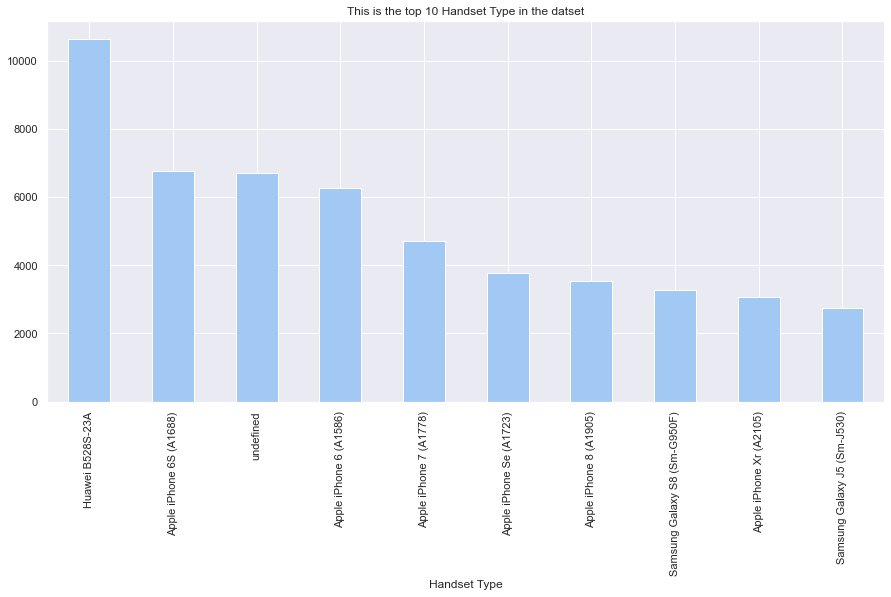

In [8]:
groupCol('Handset Type',10)

**The Market Share of the Phones**

To calulate this we use the IMEI which is a unique equipment identiier, to accurately know how many unique devices are accessing the internet. We then group them according to the manufacturer.

The handset market for mobile phone is dominated by the Huawei B528S-23A which is actually a wifi router. Thus suggesting that mainly people were accessing the resources from a wifi hotspot.This population is actually quite large as it caters for 10638 people which is  almost twice to its clossests compettitor.  

We can thus states that the Apple iPhone6s is the most used hand held deive (phone) that was used to access the internet. Apple seems to have dominated the market having manufactured 7 out of the top ten devices.  

Handset Manufacturer
Apple      42687
Samsung    30981
Huawei     21743
Name: IMEI, dtype: int64


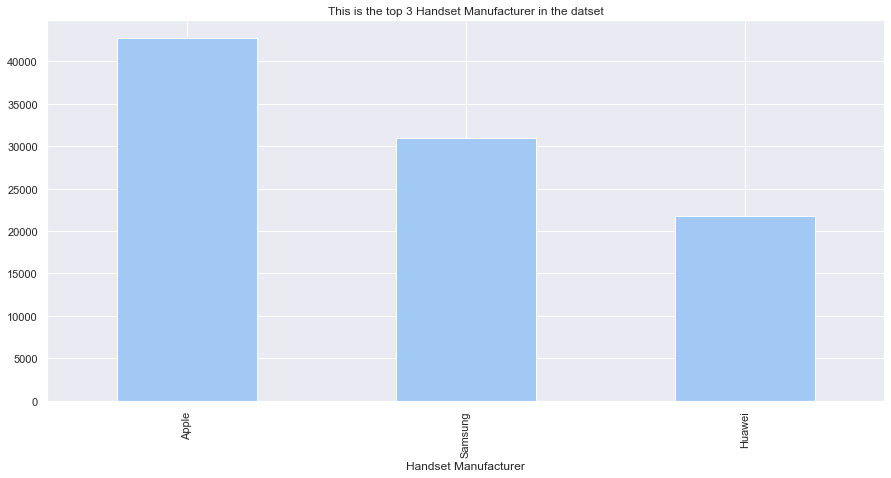

In [9]:
groupCol('Handset Manufacturer',3)

**Manufacurers Market Share**

The market share among the top 3 companies is almost spread, Apple leads with 42,687 devices while samsung holds 30,981 devices.
Most people use the apple products it shows 

In [10]:
"""
Now we find out the top 5 handsets from the top 3 manufacturers

Fist we identify the top 3 manufacturers
Then we create a subset of data of only records that belong to the respective manufacturers
We then group them by manufacturer and type and get the top 5
"""

manufacturers=['Apple','Samsung','Huawei']
top3=data.loc[data['Handset Manufacturer'].isin(manufacturers)]
print(top3.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().groupby(level=0).head(5))

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

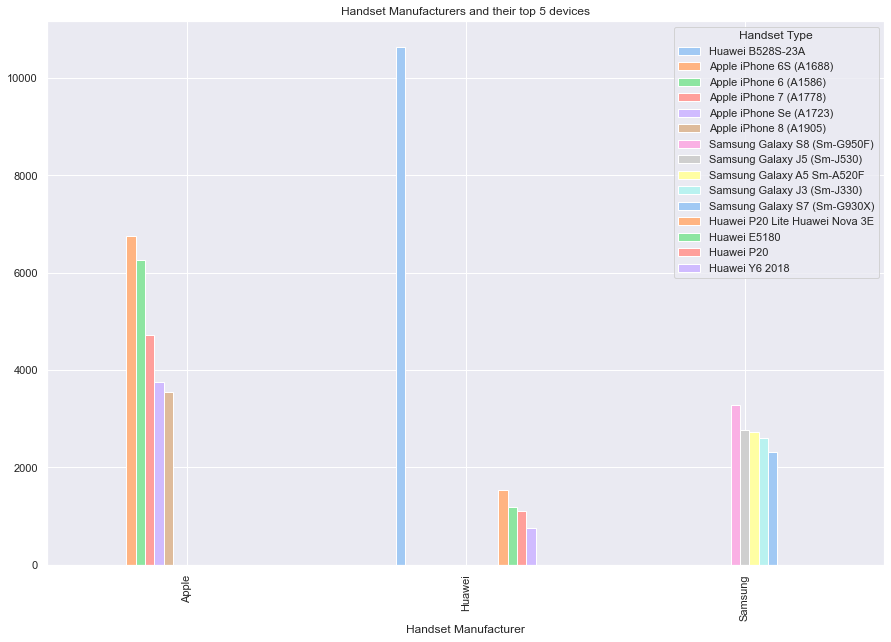

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Handset Manufacturers and their top 5 devices")
top3.groupby(['Handset Manufacturer','Handset Type'])['IMEI'].nunique().sort_values(ascending=False).groupby(level=0).head(5).unstack().plot(ax=ax,kind='bar')

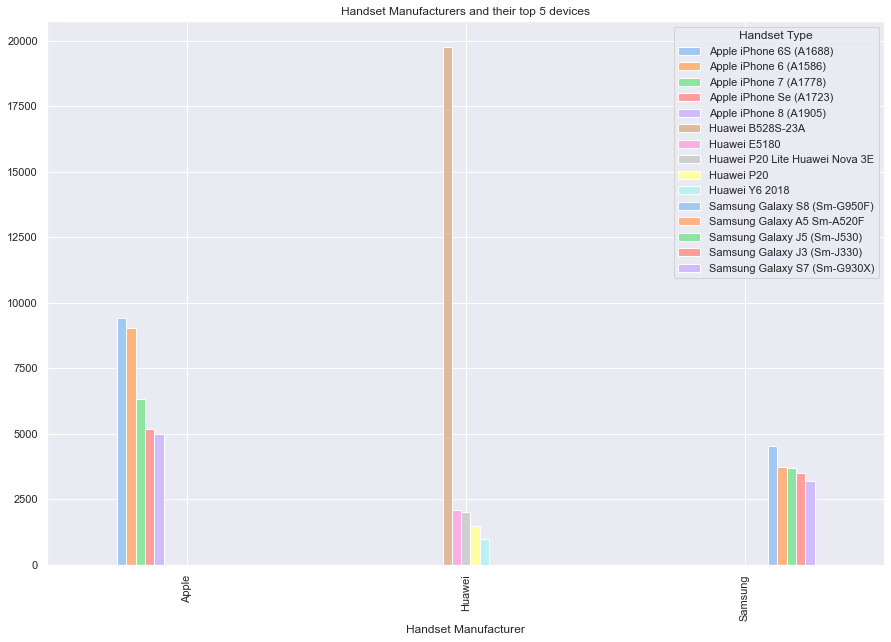

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
plt.title("Handset Manufacturers and their top 5 devices")
top3.groupby(['Handset Manufacturer'])['Handset Type'].value_counts().groupby(level=0).head(5).unstack().plot(ax=ax,kind='bar')

We calculate the number of sessions each user has had. A user is identified using a unique identifier (MSISDN/Number) hence we aggregate it with the Id of each session to get the number of seesion per user

In [13]:
userData=data.groupby(['MSISDN/Number'])['Bearer Id'].nunique().sort_values(ascending=False)
userData=pd.DataFrame(userData)
userData.columns=['No of xDR sessions']
userData

,No of xDR sessions
MSISDN/Number,
3.362632e+10,18
3.362578e+10,17
3.361489e+10,17
3.365973e+10,16
3.376054e+10,15
...,...
3.366066e+10,1
3.366066e+10,1
3.366066e+10,1


In [14]:
userData=data.groupby(['MSISDN/Number'])['Dur. (ms)'].sum().sort_values(ascending=False)
userData=pd.DataFrame(userData)
userData.columns=['Total Session Duration']
userData

,Total Session Duration
MSISDN/Number,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
...,...
3.365043e+10,7267.0
3.369839e+10,7258.0
3.365933e+10,7189.0


In [15]:
data.groupby(['MSISDN/Number']).agg({'Total DL (Bytes)':sum,'Total UL (Bytes)':sum})

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.360100e+10,8.426375e+08,36053108.0
3.360100e+10,1.207552e+08,36104459.0
3.360100e+10,5.566597e+08,39306820.0
3.360101e+10,4.019932e+08,20327526.0
3.360101e+10,1.363130e+09,94280527.0
...,...,...
3.379000e+10,6.879252e+08,26716429.0
3.379000e+10,4.445751e+08,35732243.0
3.197021e+12,1.948281e+08,37295915.0


In [16]:
data.groupby(['MSISDN/Number']).agg({
    
    'Social Media DL (Bytes)':sum,
    'Social Media UL (Bytes)':sum,
    'Google DL (Bytes)':sum,
    'Google UL (Bytes)':sum,
    'Email DL (Bytes)':sum,
    'Email UL (Bytes)':sum,
    'Youtube DL (Bytes)':sum,
    'Youtube UL (Bytes)':sum,
    'Netflix DL (Bytes)':sum,
    'Netflix UL (Bytes)':sum,
    'Gaming DL (Bytes)':sum,
    'Gaming UL (Bytes)':sum,
    'Other DL (Bytes)':sum,
    'Other UL (Bytes)':sum
    })

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes)
MSISDN/Number,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0
3.379000e+10,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0
3.197021e+12,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0


In [23]:
data['Social Media Total (Bytes)']=data['Social Media DL (Bytes)']+data['Social Media UL (Bytes)']
data['Google Total (Bytes)']=data['Google DL (Bytes)']+data['Google UL (Bytes)']
data['Email Total (Bytes)']=data['Email DL (Bytes)']+data['Email UL (Bytes)']
data['Youtube Total (Bytes)']=data['Youtube DL (Bytes)']+data['Youtube UL (Bytes)']
data['Netflix Total (Bytes)']=data['Netflix DL (Bytes)']+data['Netflix UL (Bytes)']
data['Gaming Total (Bytes)']=data['Gaming DL (Bytes)']+data['Gaming UL (Bytes)']
data['Other Total (Bytes)']=data['Other DL (Bytes)']+data['Other UL (Bytes)']


In [24]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,8.814393e+06,36749741.0,308879636.0,1.570185e+06,2.905912e+06,3.701304e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,1.505514e+07,53800391.0,653384965.0,1.933278e+06,4.414096e+06,9.373850e+05,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,4.215763e+06,27883638.0,279807335.0,1.726277e+06,1.022912e+07,3.363124e+06,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,1.279728e+07,43324218.0,846028530.0,6.574930e+05,1.181176e+07,2.070983e+06,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.391032e+07,38542814.0,569138589.0,9.127880e+05,7.748843e+06,2.110349e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.348742e+07,57628851.0,574175259.0,3.517065e+06,1.278491e+07,6.908760e+05,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,2.457758e+06,39135081.0,666648844.0,2.352181e+06,4.415361e+06,2.121718e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,1.131473e+07,34912224.0,592786405.0,1.260239e+06,6.585469e+06,2.058277e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08
149999,13114483573367300096,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,1.406930e+06,29626096.0,371895920.0,8.231090e+05,7.757267e+06,2.850914e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08


In [25]:
data.groupby(['MSISDN/Number']).agg({
    
    'Social Media Total (Bytes)':sum,
    
    'Google Total (Bytes)':sum,
    
    'Email Total (Bytes)':sum,
    
    'Youtube Total (Bytes)':sum,
   
    'Netflix Total (Bytes)':sum,
   
    'Gaming Total (Bytes)':sum,
    
    'Other Total (Bytes)':sum,
 
    })

,Social Media Total (Bytes),Google Total (Bytes),Email Total (Bytes),Youtube Total (Bytes),Netflix Total (Bytes),Gaming Total (Bytes),Other Total (Bytes)
MSISDN/Number,,,,,,,
3.360100e+10,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
3.360100e+10,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
3.360100e+10,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3.360101e+10,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
3.360101e+10,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0
...,...,...,...,...,...,...,...
3.379000e+10,300183.0,7531269.0,1006915.0,26647843.0,14902538.0,6.603614e+08,295282817.0
3.379000e+10,498569.0,5429705.0,2514097.0,19851572.0,8531060.0,4.370033e+08,211115113.0
3.197021e+12,715224.0,10438660.0,1520771.0,11959905.0,26592300.0,1.780487e+08,470526473.0


In [18]:
from eda import EDA

edaCon=EDA(data)
missinPerc=edaCon.calculateMissingValues()
missinPerc


,Total Missing,Percentage Missing
Bearer Id,0.0,0.000000
Start,1.0,0.000667
Start ms,1.0,0.000667
End,1.0,0.000667
End ms,1.0,0.000667
Dur. (ms),1.0,0.000667
IMSI,570.0,0.379997
MSISDN/Number,1066.0,0.710662
IMEI,572.0,0.381331
Last Location Name,1153.0,0.768662


In [19]:
#We drop the values that have more than 50% null values as this will affect our data insughts

datar=edaCon.dropDuplicates()

Dropping Duplicates...

There are 0  duplicates in the dataset
Done Dropping duplicates!


In [20]:
datat=data.copy()

In [21]:
edaCon.aboveThresholdMissing(.50)
missinReport=edaCon.calculateMissingValues()
missinReport

,Total Missing,Percentage Missing
Bearer Id,0.0,0.000000
Start,1.0,0.000667
Start ms,1.0,0.000667
End,1.0,0.000667
End ms,1.0,0.000667
Dur. (ms),1.0,0.000667
IMSI,570.0,0.379997
MSISDN/Number,1066.0,0.710662
IMEI,572.0,0.381331
Last Location Name,1153.0,0.768662


In [26]:
catCols=['Handset Manufacturer','Handset Type','Last Location Name','IMSI','MSISDN/Number','IMEI']
numeCols=['Start','Start ms','End','End ms','Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Activity Duration DL (ms)','Activity Duration UL (ms)','Dur. (ms).1','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B','Social Media DL (Bytes)','Social Media DL (Bytes)',
    'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)','Total UL (Bytes)','Total DL (Bytes)','Social Media Total (Bytes)','Google Total (Bytes)','Email Total (Bytes)','Youtube Total (Bytes)','Netflix Total (Bytes)','Gaming Total (Bytes)','Other Total (Bytes)']

In [27]:
#we are now going to impute the numericalCols with the Mean
for columns in numeCols:
    edaCon.imputeColumnsMean(columns)

Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the feature
Done......!!!
Imputing missing rows with mean values of the fe

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       150001 non-null  object        
 1   Start                           150001 non-null  datetime64[ns]
 2   Start ms                        150001 non-null  float64       
 3   End                             150001 non-null  datetime64[ns]
 4   End ms                          150001 non-null  float64       
 5   Dur. (ms)                       150001 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 150001 non-null  float64

In [30]:
#They have been imputed to so no we impute the categorical columns
edaCon.calculateMissingValues()

,Total Missing,Percentage Missing
Bearer Id,0.0,0.000000
Start,0.0,0.000000
Start ms,0.0,0.000000
End,0.0,0.000000
End ms,0.0,0.000000
Dur. (ms),0.0,0.000000
IMSI,570.0,0.379997
MSISDN/Number,1066.0,0.710662
IMEI,572.0,0.381331
Last Location Name,1153.0,0.768662


In [34]:
for columns in catCols:
    edaCon.imputeColumnsMode(columns)

Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!
Imputing missing rows with mode values of the feature
Done......!!!


In [35]:
#They have been imputed to so no we impute the categorical columns
edaCon.calculateMissingValues()

,Total Missing,Percentage Missing
Bearer Id,0.0,0.000000
Start,0.0,0.000000
Start ms,0.0,0.000000
End,0.0,0.000000
End ms,0.0,0.000000
Dur. (ms),0.0,0.000000
IMSI,570.0,0.379997
MSISDN/Number,1066.0,0.710662
IMEI,572.0,0.381331
Last Location Name,1153.0,0.768662


In [38]:
from univariate import Univariate


uniAnalysis=Univariate(data)

In [40]:
uniAnalysis.calculateMetrics('Dur. (ms)')

Reading data
Done
Calculating the univariate metrics of the columns Dur. (ms)
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,104608.560347
Mode,[86399.0]
Median,86399.0
Skew,3.952582
Kurtosis,37.02118
Standard deviation,81037.08123
Variance,6567008534.276449


### Duration 